# **Day 2**
### Linear Regression Model To Predict House Prices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


Text(0.5, 1.0, 'Medv')

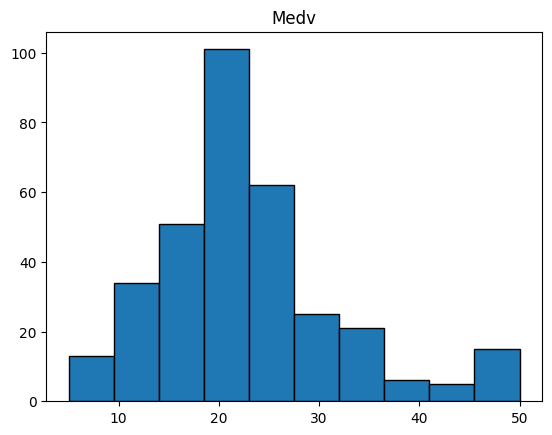

In [ ]:
#The target variable we have is medv
plt.hist(df.medv, ec='black')
plt.title("Medv")

<Axes: >

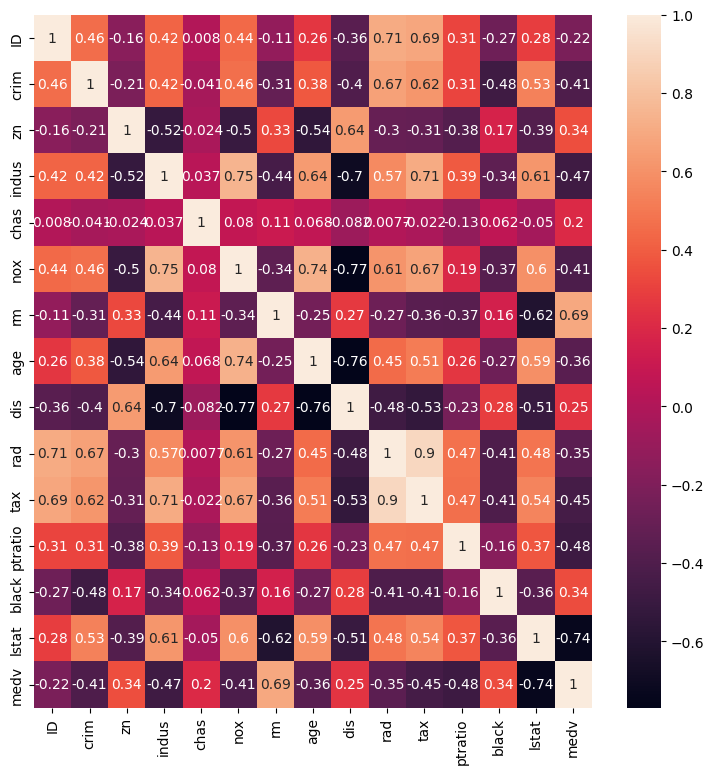

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

## The highest correlated feature with medv is 'rm'. Now we will plot the scatter diagram to check assumptions of Pearson Correlation.

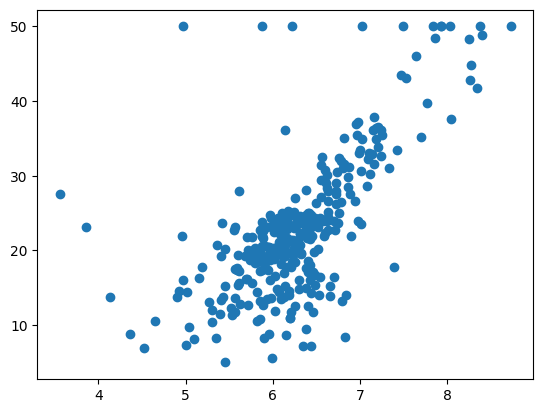

In [ ]:
plt.scatter(df.rm,df.medv)

### As we have detected bivariate outliers from scatter diagram so we will calculate the correlation by non-parametric measure "Spearman's Correlation".

Spearman's correlation =  0.6351734552097772


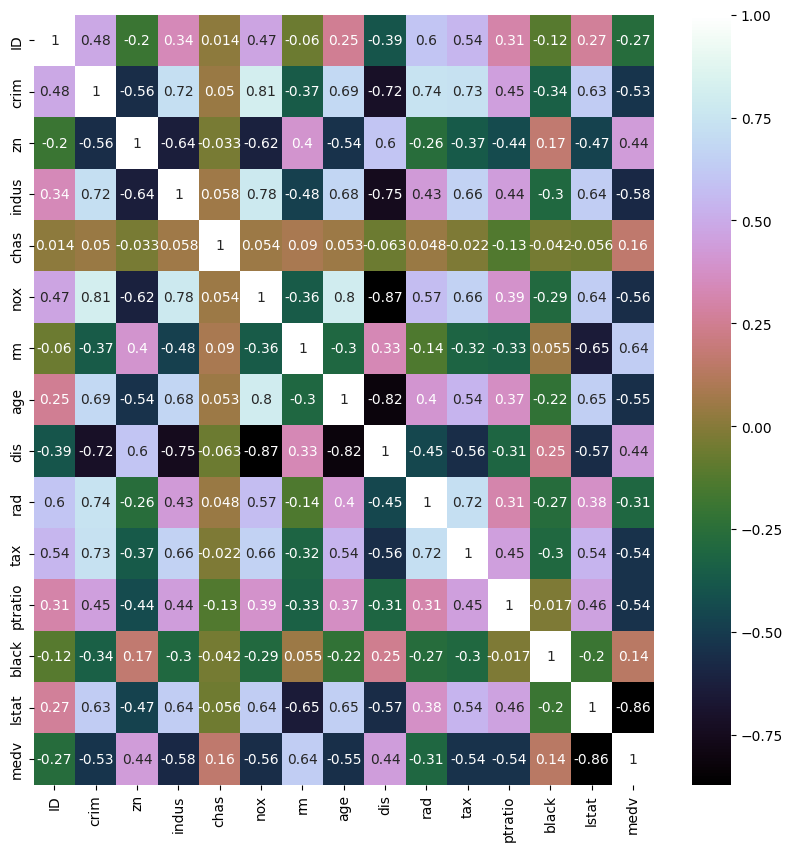

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method="spearman"),annot=True,cmap='cubehelix')
Sr = df.corr(method="spearman").loc['rm', 'medv']
print("Spearman's correlation = ",Sr)

### We will select 'rm' as independent variable and 'medv' as dependent variable

In [ ]:
x = df.rm
y = df.medv

Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2)

**Normalizing the features**

In [ ]:
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(np.array(Xtrain).reshape(-1, 1))
Xtest = scaler.transform(np.array(Xtest).reshape(-1, 1))



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain,Ytrain)

predictions = model.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('\nMean Squared Error: ',mean_squared_error(Ytest, predictions))
print('\nR-squared score or Coefficient of Determination: ',r2_score(Ytest, predictions))


Mean Squared Error:  31.71307715311392

R-squared score or Coefficient of Determination:  0.5803280229313516


### With an R2 score of 0.58, it indicates that approximately 58% of the variability in the dependent variable is explained by the independent variable.